In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score

In [3]:
# Load the data from CSV file
df = pd.read_csv('/content/drive/MyDrive/PKM RE 2024/Codingan/citrus_flavor_v2.csv')

df.head()

,Red,Green,Blue,L,a,b,H,S,V,Rasa
0,137,112,74,124.0,132.0,153.0,18.0,117.0,137.0,Manis
1,137,112,74,124.0,132.0,153.0,18.0,117.0,137.0,Manis
2,125,103,65,115.0,131.0,153.0,19.0,122.0,125.0,Manis
3,135,80,28,101.0,147.0,166.0,15.0,202.0,135.0,Manis
4,153,110,24,126.0,137.0,178.0,20.0,215.0,153.0,Manis


# RGB

==================== euclidean ====================

Accuracy with euclidean metric: 0.7917
Kappa score with euclidean metric: 0.6875
Fit time with euclidean metric: 0.0012 seconds
Prediction time with euclidean metric: 0.0034 seconds
Total execution time with euclidean metric: 0.0046 seconds

Classification report with euclidean metric:
              precision    recall  f1-score   support

        Asam       0.88      0.70      0.78        10
       Manis       0.88      1.00      0.93         7
       Tawar       0.62      0.71      0.67         7

    accuracy                           0.79        24
   macro avg       0.79      0.80      0.79        24
weighted avg       0.80      0.79      0.79        24


==================== manhattan ====================

Accuracy with manhattan metric: 0.7083
Kappa score with manhattan metric: 0.5556
Fit time with manhattan metric: 0.0009 seconds
Prediction time with manhattan metric: 0.0043 seconds
Total execution time with manhattan metric:

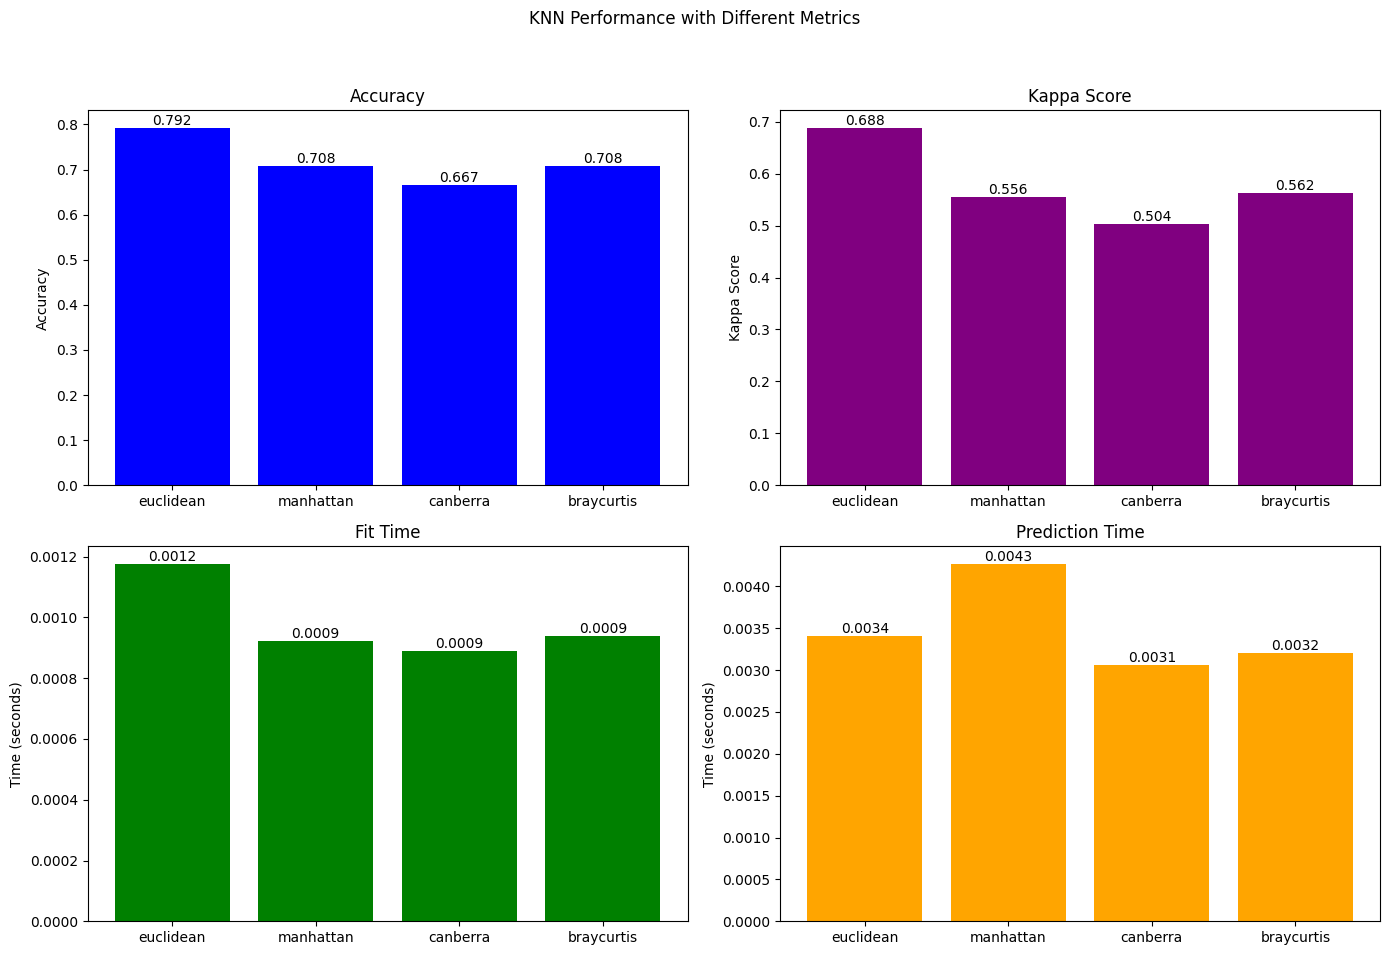

In [4]:
# Split data into features and target variable
X = df[['Red', 'Green', 'Blue']]
y = df['Rasa']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of distance metrics to test
metrics = ['euclidean', 'manhattan', 'canberra', 'braycurtis']

# Lists to store results for visualization
accuracies = []
fit_times = []
predict_times = []
total_times = []
kappa_scores = []

# Iterate through each metric and evaluate the KNN classifier
for metric in metrics:
    # Instantiate KNN classifier with the given metric
    knn = KNeighborsClassifier(n_neighbors=11, metric=metric)

    # Record the start time for fitting
    fit_start_time = time.time()

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train)

    # Record the end time for fitting
    fit_end_time = time.time()

    # Record the start time for prediction
    predict_start_time = time.time()

    # Predict the test set results
    y_pred = knn.predict(X_test_scaled)

    # Record the end time for prediction
    predict_end_time = time.time()

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Cohen's kappa score
    kappa = cohen_kappa_score(y_test, y_pred)

    # Calculate execution times
    fit_time = fit_end_time - fit_start_time
    predict_time = predict_end_time - predict_start_time
    total_time = fit_time + predict_time

    # Store results
    accuracies.append(accuracy)
    fit_times.append(fit_time)
    predict_times.append(predict_time)
    total_times.append(total_time)
    kappa_scores.append(kappa)

    # Display metrics
    print(f"==================== {metric} ====================\n")
    print(f"Accuracy with {metric} metric: {accuracy:.4f}")
    print(f"Kappa score with {metric} metric: {kappa:.4f}")
    print(f"Fit time with {metric} metric: {fit_time:.4f} seconds")
    print(f"Prediction time with {metric} metric: {predict_time:.4f} seconds")
    print(f"Total execution time with {metric} metric: {total_time:.4f} seconds\n")

    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification report with {metric} metric:\n{report}\n")

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('KNN Performance with Different Metrics')

# Accuracy plot
bars_acc = axs[0, 0].bar(metrics, accuracies, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Accuracy')

for bar, acc in zip(bars_acc, accuracies):
    yval = round(acc, 3)
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Kappa score plot
bars_kappa = axs[0, 1].bar(metrics, kappa_scores, color='purple')
axs[0, 1].set_title('Kappa Score')
axs[0, 1].set_ylabel('Kappa Score')

for bar, kappa_score in zip(bars_kappa, kappa_scores):
    yval = round(kappa_score, 3)
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Fit time plot
bars_fit = axs[1, 0].bar(metrics, fit_times, color='green')
axs[1, 0].set_title('Fit Time')
axs[1, 0].set_ylabel('Time (seconds)')

for bar, fit_time_val in zip(bars_fit, fit_times):
    yval = round(fit_time_val, 4)
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Prediction time plot
bars_predict = axs[1, 1].bar(metrics, predict_times, color='orange')
axs[1, 1].set_title('Prediction Time')
axs[1, 1].set_ylabel('Time (seconds)')

for bar, predict_time_val in zip(bars_predict, predict_times):
    yval = round(predict_time_val, 4)
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display plots
plt.show()

# HSV

==================== euclidean ====================

Accuracy with euclidean metric: 0.8333
Kappa score with euclidean metric: 0.7500
Fit time with euclidean metric: 0.0010 seconds
Prediction time with euclidean metric: 0.0038 seconds
Total execution time with euclidean metric: 0.0048 seconds

Classification report with euclidean metric:
              precision    recall  f1-score   support

        Asam       0.88      0.70      0.78        10
       Manis       1.00      1.00      1.00         7
       Tawar       0.67      0.86      0.75         7

    accuracy                           0.83        24
   macro avg       0.85      0.85      0.84        24
weighted avg       0.85      0.83      0.83        24


==================== manhattan ====================

Accuracy with manhattan metric: 0.7500
Kappa score with manhattan metric: 0.6250
Fit time with manhattan metric: 0.0011 seconds
Prediction time with manhattan metric: 0.0044 seconds
Total execution time with manhattan metric:

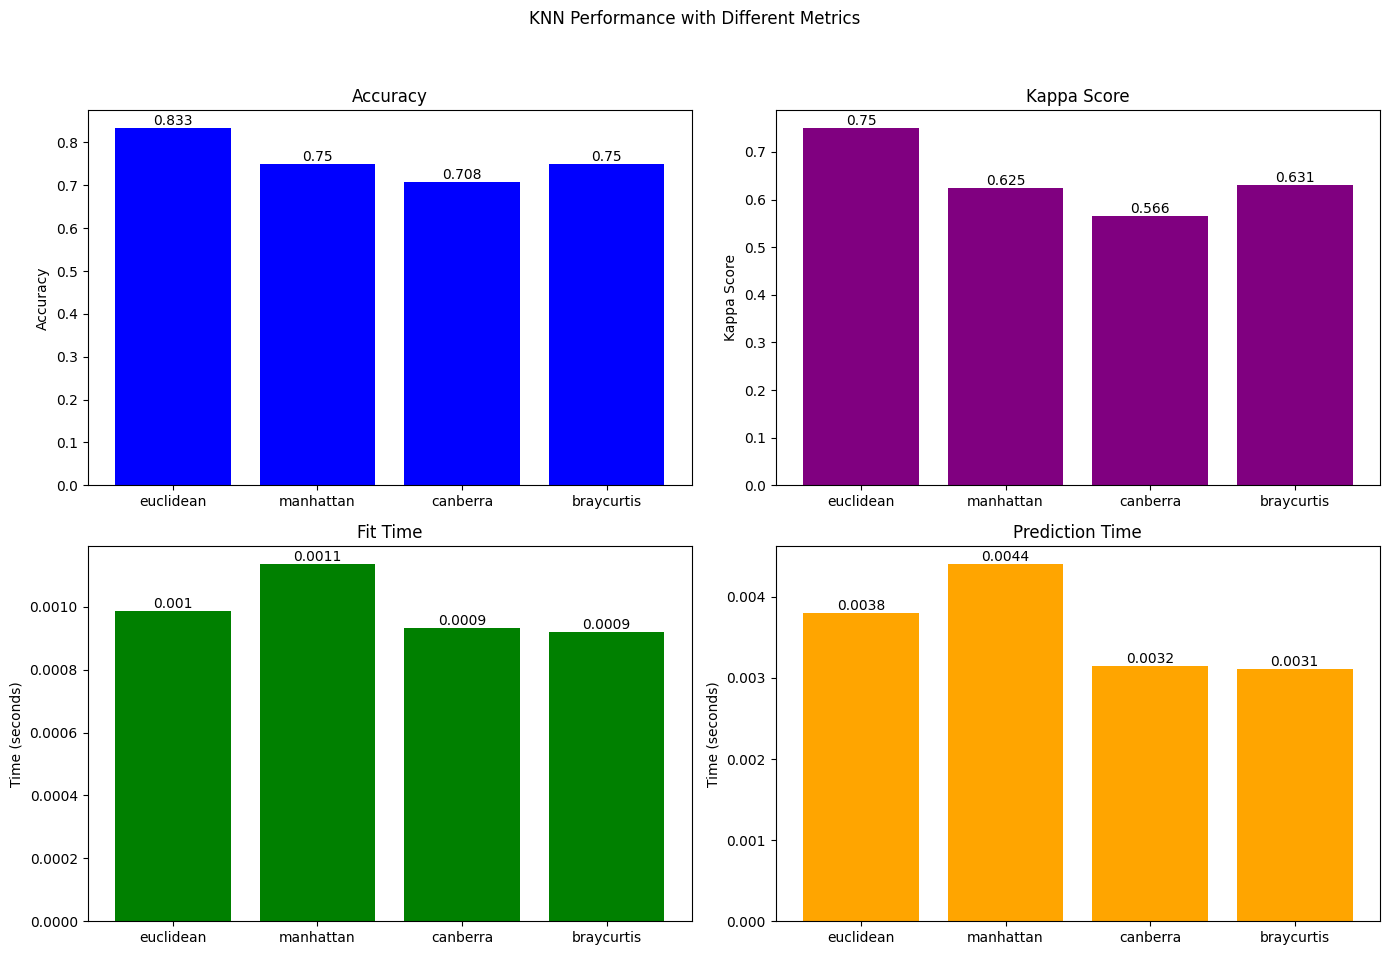

In [5]:
# Split data into features and target variable
X = df[['H', 'S', 'V']]
y = df['Rasa']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of distance metrics to test
metrics = ['euclidean', 'manhattan', 'canberra', 'braycurtis']

# Lists to store results for visualization
accuracies = []
fit_times = []
predict_times = []
total_times = []
kappa_scores = []

# Iterate through each metric and evaluate the KNN classifier
for metric in metrics:
    # Instantiate KNN classifier with the given metric
    knn = KNeighborsClassifier(n_neighbors=11, metric=metric)

    # Record the start time for fitting
    fit_start_time = time.time()

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train)

    # Record the end time for fitting
    fit_end_time = time.time()

    # Record the start time for prediction
    predict_start_time = time.time()

    # Predict the test set results
    y_pred = knn.predict(X_test_scaled)

    # Record the end time for prediction
    predict_end_time = time.time()

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Cohen's kappa score
    kappa = cohen_kappa_score(y_test, y_pred)

    # Calculate execution times
    fit_time = fit_end_time - fit_start_time
    predict_time = predict_end_time - predict_start_time
    total_time = fit_time + predict_time

    # Store results
    accuracies.append(accuracy)
    fit_times.append(fit_time)
    predict_times.append(predict_time)
    total_times.append(total_time)
    kappa_scores.append(kappa)

    # Display metrics
    print(f"==================== {metric} ====================\n")
    print(f"Accuracy with {metric} metric: {accuracy:.4f}")
    print(f"Kappa score with {metric} metric: {kappa:.4f}")
    print(f"Fit time with {metric} metric: {fit_time:.4f} seconds")
    print(f"Prediction time with {metric} metric: {predict_time:.4f} seconds")
    print(f"Total execution time with {metric} metric: {total_time:.4f} seconds\n")

    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification report with {metric} metric:\n{report}\n")

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('KNN Performance with Different Metrics')

# Accuracy plot
bars_acc = axs[0, 0].bar(metrics, accuracies, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Accuracy')

for bar, acc in zip(bars_acc, accuracies):
    yval = round(acc, 3)
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Kappa score plot
bars_kappa = axs[0, 1].bar(metrics, kappa_scores, color='purple')
axs[0, 1].set_title('Kappa Score')
axs[0, 1].set_ylabel('Kappa Score')

for bar, kappa_score in zip(bars_kappa, kappa_scores):
    yval = round(kappa_score, 3)
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Fit time plot
bars_fit = axs[1, 0].bar(metrics, fit_times, color='green')
axs[1, 0].set_title('Fit Time')
axs[1, 0].set_ylabel('Time (seconds)')

for bar, fit_time_val in zip(bars_fit, fit_times):
    yval = round(fit_time_val, 4)
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Prediction time plot
bars_predict = axs[1, 1].bar(metrics, predict_times, color='orange')
axs[1, 1].set_title('Prediction Time')
axs[1, 1].set_ylabel('Time (seconds)')

for bar, predict_time_val in zip(bars_predict, predict_times):
    yval = round(predict_time_val, 4)
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display plots
plt.show()

# Lab

==================== euclidean ====================

Accuracy with euclidean metric: 0.7083
Kappa score with euclidean metric: 0.5591
Fit time with euclidean metric: 0.0010 seconds
Prediction time with euclidean metric: 0.0037 seconds
Total execution time with euclidean metric: 0.0047 seconds

Classification report with euclidean metric:
              precision    recall  f1-score   support

        Asam       0.67      0.60      0.63        10
       Manis       0.86      0.86      0.86         7
       Tawar       0.62      0.71      0.67         7

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.72        24
weighted avg       0.71      0.71      0.71        24


==================== manhattan ====================

Accuracy with manhattan metric: 0.6667
Kappa score with manhattan metric: 0.5039
Fit time with manhattan metric: 0.0009 seconds
Prediction time with manhattan metric: 0.0032 seconds
Total execution time with manhattan metric:

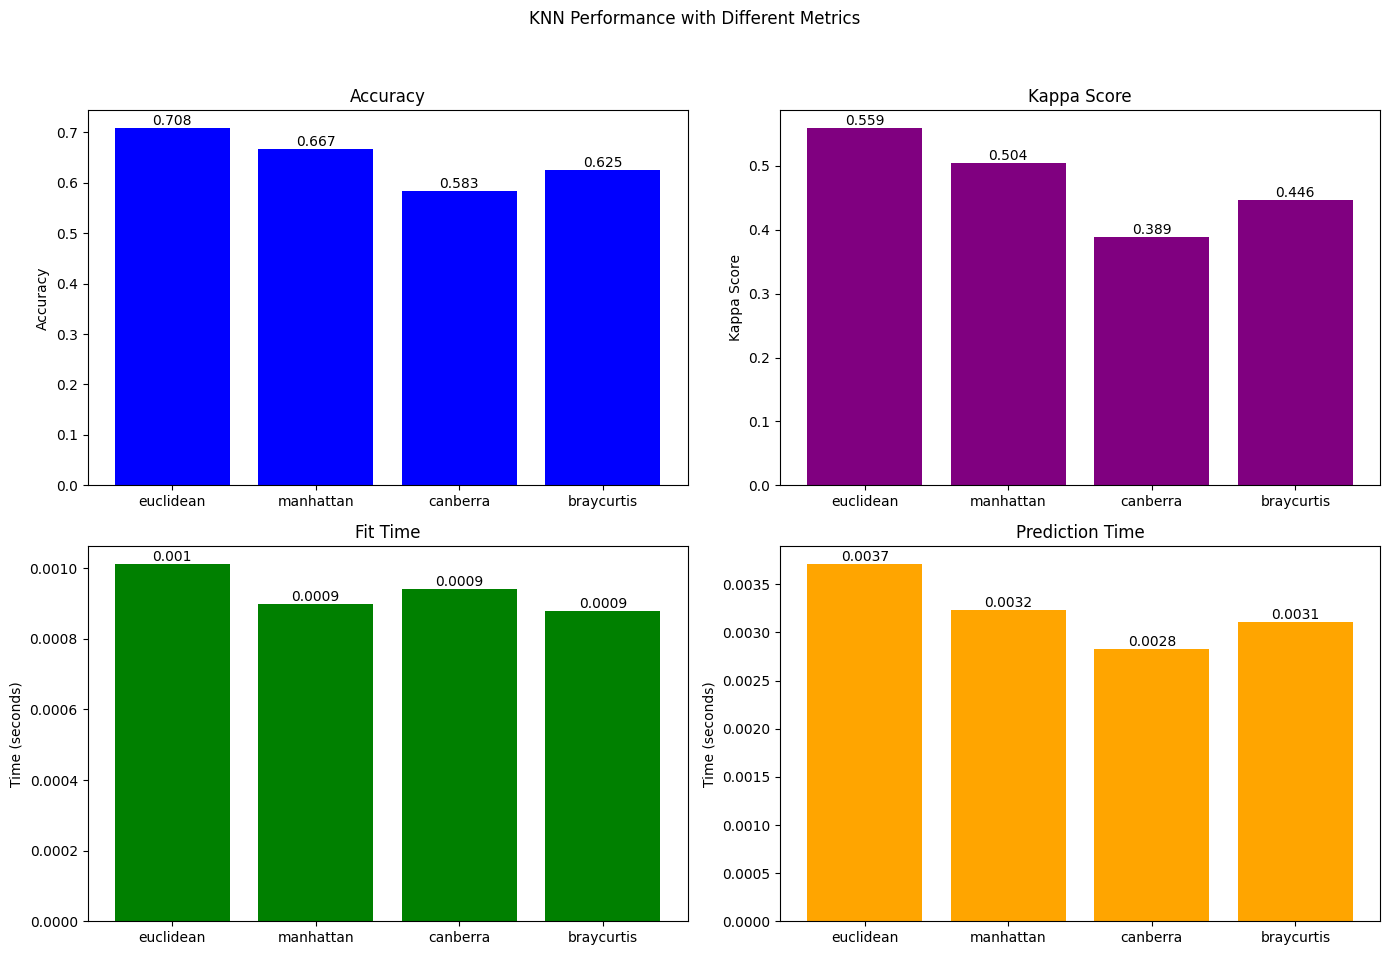

In [6]:
# Split data into features and target variable
X = df[['L', 'a', 'b']]
y = df['Rasa']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of distance metrics to test
metrics = ['euclidean', 'manhattan', 'canberra', 'braycurtis']

# Lists to store results for visualization
accuracies = []
fit_times = []
predict_times = []
total_times = []
kappa_scores = []

# Iterate through each metric and evaluate the KNN classifier
for metric in metrics:
    # Instantiate KNN classifier with the given metric
    knn = KNeighborsClassifier(n_neighbors=11, metric=metric)

    # Record the start time for fitting
    fit_start_time = time.time()

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train)

    # Record the end time for fitting
    fit_end_time = time.time()

    # Record the start time for prediction
    predict_start_time = time.time()

    # Predict the test set results
    y_pred = knn.predict(X_test_scaled)

    # Record the end time for prediction
    predict_end_time = time.time()

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Cohen's kappa score
    kappa = cohen_kappa_score(y_test, y_pred)

    # Calculate execution times
    fit_time = fit_end_time - fit_start_time
    predict_time = predict_end_time - predict_start_time
    total_time = fit_time + predict_time

    # Store results
    accuracies.append(accuracy)
    fit_times.append(fit_time)
    predict_times.append(predict_time)
    total_times.append(total_time)
    kappa_scores.append(kappa)

    # Display metrics
    print(f"==================== {metric} ====================\n")
    print(f"Accuracy with {metric} metric: {accuracy:.4f}")
    print(f"Kappa score with {metric} metric: {kappa:.4f}")
    print(f"Fit time with {metric} metric: {fit_time:.4f} seconds")
    print(f"Prediction time with {metric} metric: {predict_time:.4f} seconds")
    print(f"Total execution time with {metric} metric: {total_time:.4f} seconds\n")

    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification report with {metric} metric:\n{report}\n")

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('KNN Performance with Different Metrics')

# Accuracy plot
bars_acc = axs[0, 0].bar(metrics, accuracies, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Accuracy')

for bar, acc in zip(bars_acc, accuracies):
    yval = round(acc, 3)
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Kappa score plot
bars_kappa = axs[0, 1].bar(metrics, kappa_scores, color='purple')
axs[0, 1].set_title('Kappa Score')
axs[0, 1].set_ylabel('Kappa Score')

for bar, kappa_score in zip(bars_kappa, kappa_scores):
    yval = round(kappa_score, 3)
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Fit time plot
bars_fit = axs[1, 0].bar(metrics, fit_times, color='green')
axs[1, 0].set_title('Fit Time')
axs[1, 0].set_ylabel('Time (seconds)')

for bar, fit_time_val in zip(bars_fit, fit_times):
    yval = round(fit_time_val, 4)
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Prediction time plot
bars_predict = axs[1, 1].bar(metrics, predict_times, color='orange')
axs[1, 1].set_title('Prediction Time')
axs[1, 1].set_ylabel('Time (seconds)')

for bar, predict_time_val in zip(bars_predict, predict_times):
    yval = round(predict_time_val, 4)
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display plots
plt.show()